In [3]:
import pandas as pd
import numpy as np

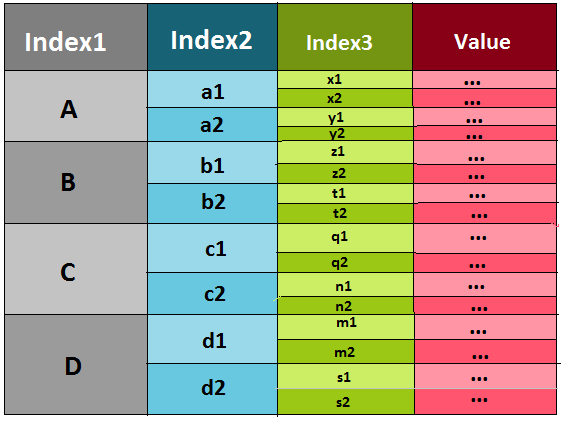

# Hierarchical indexing (MultiIndex)
Hiyerarşik / Çok seviyeli indeksleme, özellikle daha yüksek boyutlu verilerle çalışmak için oldukça karmaşık veri analizi ve manipülasyonuna kapı açtığı için çok heyecan vericidir. Özünde, Series(1d) ve DataFrame(2d) gibi daha düşük boyutlu veri yapılarında keyfi sayıda boyuta sahip verileri depolamanıza ve değiştirmenize olanak tanır .

## Bir MultiIndex (hiyerarşik dizin) nesnesi oluşturma
MultiIdex 
- MultiIndex.from_arrays()
- MultiIndex.from_tuples()
- MultiIndex.from_product()
- MultiIndex.from_frame()
methodları yoluyla oluşturulabilir.

### 1.MultiIndex.from_tuples()

In [30]:
arrays = [
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

### 2. MultiIndex.from_product()

In [18]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]

In [19]:
index = pd.MultiIndex.from_product(iterables, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [14]:
df = pd.DataFrame(np.random.randn(8,2), index=index)
df

0         1
first second                    
bar   one     0.996457  0.343901
      two     0.000856  1.257738
baz   one    -0.340225  0.311046
      two    -0.789309 -0.621340
foo   one     0.088308  0.659318
      two     1.380514 -0.657121
qux   one     0.439413  1.586816
      two     2.478965  1.499704

### 3.MultiIndex.to_frame()

In [21]:
df1 = pd.DataFrame(
        [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
        columns=["first", "second"])

In [22]:
index=pd.MultiIndex.from_frame(df1)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

In [24]:
df = pd.DataFrame(np.random.randn(4,3),index=index)
df

0         1         2
first second                              
bar   one    -0.397469  1.015697  0.124630
      two    -0.855598 -1.637722  0.752554
foo   one     0.145050  1.476093  1.137193
      two    -0.490999  0.484136  0.060073

### 4.MultiIndex.from_arrays()

In [25]:
arrays = [
        np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
        np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
    ]

In [37]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays, columns=['var1','var2','var3','var4'])
df

var1      var2      var3      var4
bar one  0.135537  0.235311 -1.825717 -1.094835
    two  0.074650 -1.402979  0.140099  0.603443
baz one -0.442150 -1.047133 -1.485128 -1.059406
    two  0.053054  1.280900  0.207592  0.256600
foo one  1.433014 -1.565186 -1.246064 -0.896227
    two  1.578030 -0.248011 -1.192654  0.662875
qux one -0.241790  1.127899 -1.429158 -1.004573
    two  0.349361  0.860526 -0.102590 -1.115299

### 5. Hierarchical columns 

In [35]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.767493  0.551178 -0.294556 -1.547463 -0.115736  2.136012 -2.039015   
B      -0.040183 -0.199296 -0.207995  1.159967 -0.537932 -0.669408  1.845931   
C      -1.238277 -0.076833  0.483391  1.757537  0.994030  0.517452  0.330726   

first             
second       two  
A       0.273375  
B       1.657198  
C      -1.238205

## Uygulama1:
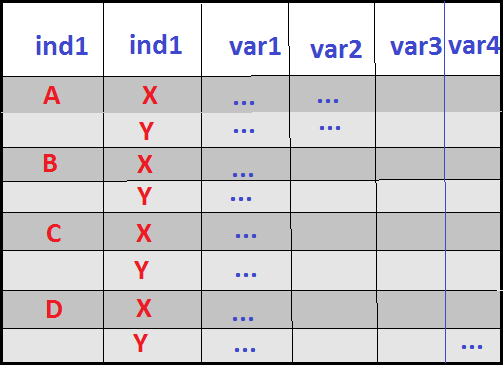
şeklinde multi indexli bir data frame oluşturun

# Reshaping and pivot tables

In [1]:
import numpy as np
import pandas as pd

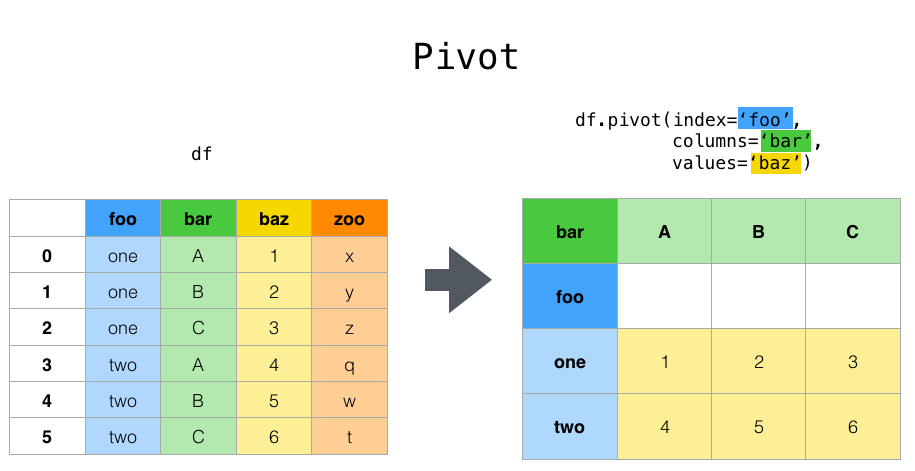

### 1.Data Frame oluşturma

In [4]:
data = {
    'foo':['ONE','ONE','ONE','TWO','TWO','TWO'],
    'bar':['A','B','C']*2,
    'baz':[1,2,3,4,5,6],
    'zoo':['x','y','z','q','w','t']
}
df = pd.DataFrame(data, columns=['foo','bar','baz','zoo'])

In [5]:
df

foo bar  baz zoo
0  ONE   A    1   x
1  ONE   B    2   y
2  ONE   C    3   z
3  TWO   A    4   q
4  TWO   B    5   w
5  TWO   C    6   t

### 2.Pivot tablo
### df.pivot(index='...',columns='...',values='...')

In [6]:
df.pivot(index='foo',columns='bar',values='baz')

bar  A  B  C
foo         
ONE  1  2  3
TWO  4  5  6

In [7]:
df.pivot(index='foo',columns='bar',values='zoo')

bar  A  B  C
foo         
ONE  x  y  z
TWO  q  w  t

In [8]:
df.pivot(index='foo',columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
ONE   1  2  3   x  y  z
TWO   4  5  6   q  w  t

## 2.Uygulama
- Bir data frame oluşturun
- Değişkenleri 
    var1=['A','A','B','B','C','C'],
    var2=['X','Y','Z','X','Y','Z'],
    var3=[1,2,3,4,5,6] olsun.
- Bu data frame ile index=var1, columns=var2 olan bir pivot tablo oluşturun.
- ilk data frame var4 adında, var3 değişkeninin verilerinin iki katı alınarak oluşturulmuş değişkeni ekleyin
- Yeni data frame ile pivot fonksiyonun values parametresi var3, var4 ve herhangi bir atama yapmadan oluşturulabilecek pivot tabloları elde edin. 

# Reshaping by stacking and unstacking

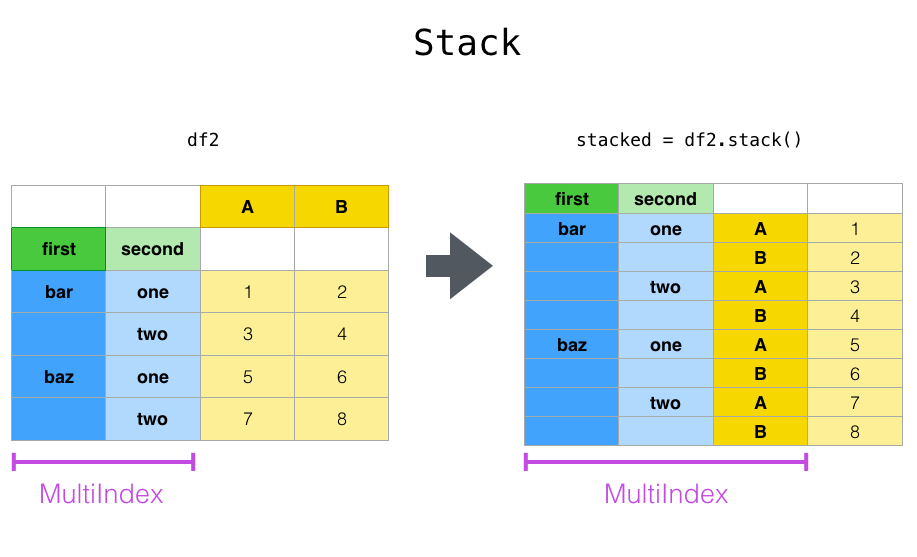

#### MultiIndex DataFrame oluşturma

In [39]:
liste = [
    ['A','A','B','B','C','C'],
    ['X','Y','X','Y','X','Y']
]

tuples = list(zip(*liste))
tuples

[('A', 'X'), ('A', 'Y'), ('B', 'X'), ('B', 'Y'), ('C', 'X'), ('C', 'Y')]

In [51]:
index = pd.MultiIndex.from_product([['A','B','C'],['X','Y']], names=['ind1','ind2'])
index

MultiIndex([('A', 'X'),
            ('A', 'Y'),
            ('B', 'X'),
            ('B', 'Y'),
            ('C', 'X'),
            ('C', 'Y')],
           names=['ind1', 'ind2'])

In [52]:
df = pd.DataFrame(np.random.randn(6,3), index=index, columns=['a','b','c'])
df

a         b         c
ind1 ind2                              
A    X    -0.830736 -1.436695  0.429854
     Y    -0.358724  1.149795 -0.080177
B    X     1.033371  0.616289  0.319243
     Y    -0.097402 -0.564451 -0.562810
C    X     0.218864 -0.767196  0.361906
     Y    -0.830087 -1.846150 -0.354172

In [50]:
index = pd.MultiIndex.from_product([["A","B","C"], ["a", "b"]], names=['inx1','inx2'])

df = pd.DataFrame(np.random.randn(6), index=index, columns=["A"])

df

A
inx1 inx2          
A    a     0.944725
     b    -1.665948
B    a    -1.574773
     b    -0.228190
C    a    -0.543288
     b     1.509478

## df.stack( )

In [44]:
stacked = df.stack()
stacked

ind1  ind2   
A     X     a   -1.128599
            b    0.362903
            c    0.078245
      Y     a    0.110144
            b   -0.041710
            c    0.309239
B     X     a    1.205815
            b   -1.698855
            c    0.552461
      Y     a   -0.305302
            b   -0.904743
            c   -1.913191
C     X     a    0.171854
            b    0.646224
            c   -0.892278
      Y     a    0.502728
            b   -1.437249
            c    0.075185
dtype: float64

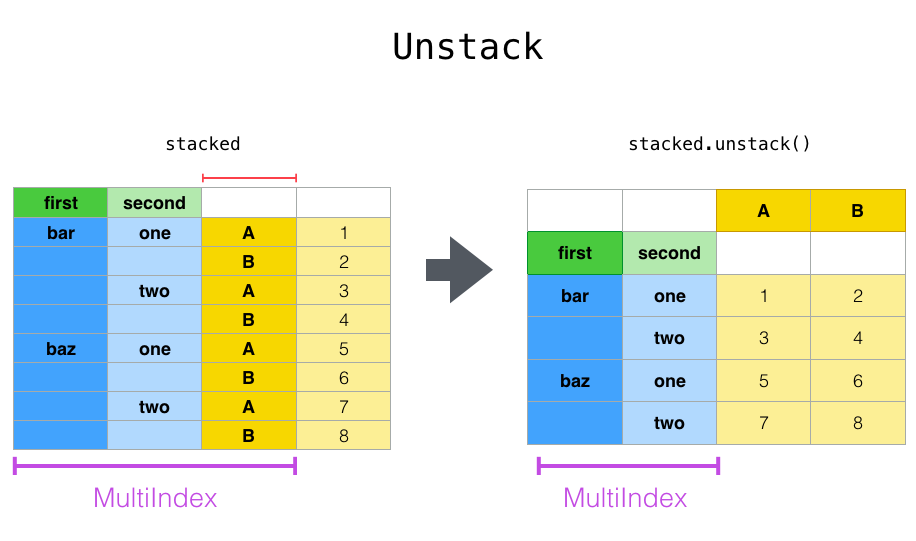

### df.unstack( )

In [45]:
stacked.unstack()

a         b         c
ind1 ind2                              
A    X    -1.128599  0.362903  0.078245
     Y     0.110144 -0.041710  0.309239
B    X     1.205815 -1.698855  0.552461
     Y    -0.305302 -0.904743 -1.913191
C    X     0.171854  0.646224 -0.892278
     Y     0.502728 -1.437249  0.075185

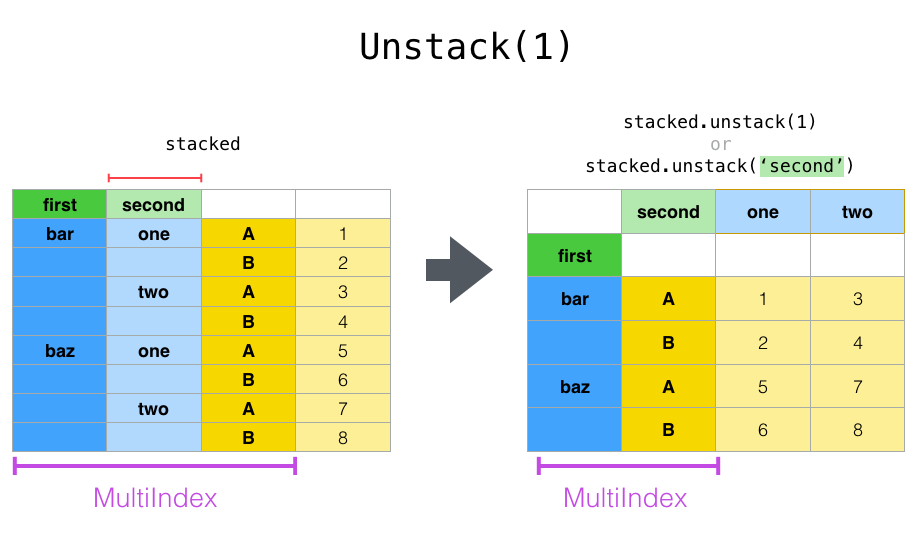
### stacked.unstack(1) veya stacked.unstack('second')

In [47]:
stacked.unstack(1)

ind2           X         Y
ind1                      
A    a -1.128599  0.110144
     b  0.362903 -0.041710
     c  0.078245  0.309239
B    a  1.205815 -0.305302
     b -1.698855 -0.904743
     c  0.552461 -1.913191
C    a  0.171854  0.502728
     b  0.646224 -1.437249
     c -0.892278  0.075185

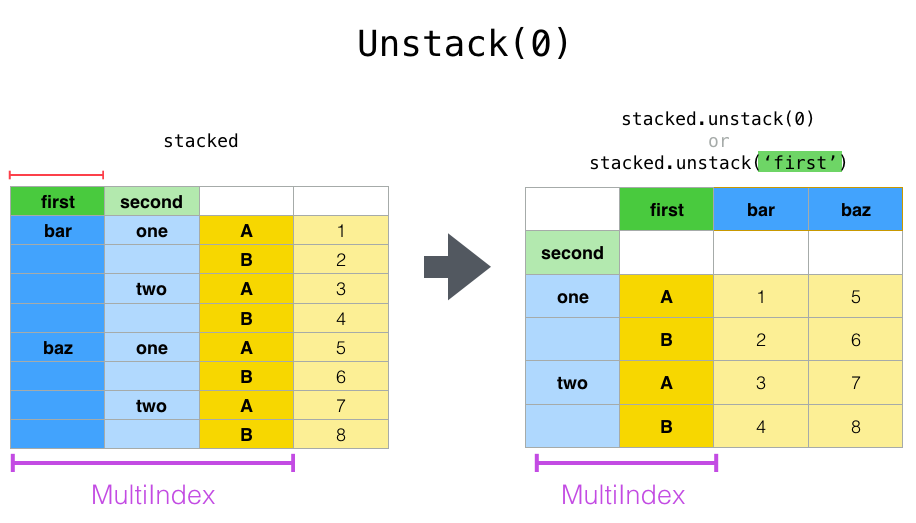
### stacked.unstack(0) veya stacked.unstack("first")

In [48]:
stacked.unstack(0)

ind1           A         B         C
ind2                                
X    a -1.128599  1.205815  0.171854
     b  0.362903 -1.698855  0.646224
     c  0.078245  0.552461 -0.892278
Y    a  0.110144 -0.305302  0.502728
     b -0.041710 -0.904743 -1.437249
     c  0.309239 -1.913191  0.075185

## Uygulama 3:
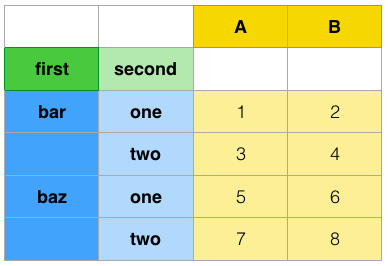
- Bu DataFrame oluşturun.
- Daha sonra Data Framei sıasıyla aşağıdaki formatlara dönüştürün
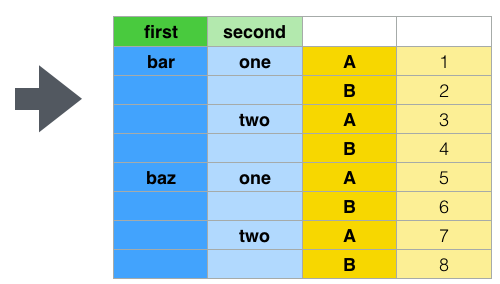
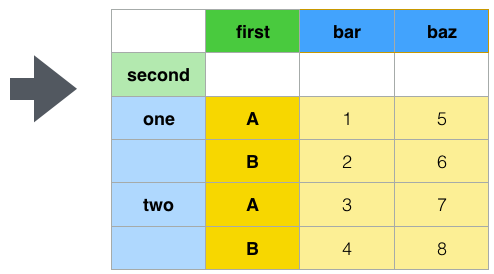
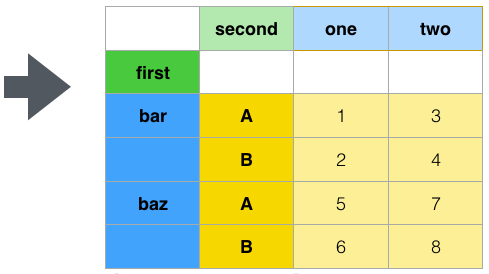


#### Multi columns arasından istenilen columna göre stack yapmak
#### df.stack(level=["ind2", "ind3"]) or df.stack(level=[1, 2])

In [68]:
col = pd.MultiIndex.from_product([['A','B'],['X','Y'],['a','b']], names=['ind1','ind2','ind3'])
df = pd.DataFrame(np.random.randn(4,8), columns=col)
df

ind1         A                                       B                      \
ind2         X                   Y                   X                   Y   
ind3         a         b         a         b         a         b         a   
0     1.184508  0.690179 -0.177093 -0.254549 -0.262884 -0.617884  0.169093   
1    -0.831907  0.978967 -0.973097  1.519644  0.508023  0.716751 -0.443354   
2    -0.172250  2.177943  1.302542 -0.818458  0.074492 -0.202689 -0.314494   
3    -0.185581  1.281164  1.606372  0.314996  0.382564 -0.841158  0.909540   

ind1            
ind2            
ind3         b  
0     1.565812  
1     0.745849  
2     0.921514  
3     2.054512

In [72]:
df.stack(level=[1, 2])

ind1                A         B
  ind2 ind3                    
0 X    a     1.184508 -0.262884
       b     0.690179 -0.617884
  Y    a    -0.177093  0.169093
       b    -0.254549  1.565812
1 X    a    -0.831907  0.508023
       b     0.978967  0.716751
  Y    a    -0.973097 -0.443354
       b     1.519644  0.745849
2 X    a    -0.172250  0.074492
       b     2.177943 -0.202689
  Y    a     1.302542 -0.314494
       b    -0.818458  0.921514
3 X    a    -0.185581  0.382564
       b     1.281164 -0.841158
  Y    a     1.606372  0.909540
       b     0.314996  2.054512

### Multi column ve multi index içeren data frame

In [75]:
columns = pd.MultiIndex.from_product([['A','B'],['a','b']], names=['var1','var2'])

index = pd.MultiIndex.from_product([['X','Y'],['q','z']], names=['ind1','ind2'])

In [77]:
df = pd.DataFrame(np.random.randn(4,4), index=index, columns=columns)
df

var1         A                   B          
var2         a         b         a         b
X q  -0.874218 -1.629557  1.804819 -0.232313
  z   1.286935  2.077510  0.884554 -0.083853
Y q  -0.609363 -2.602274 -0.098873  2.031487
  z   0.057484 -1.617160  0.611673 -0.153653

In [73]:
columns = pd.MultiIndex.from_tuples(
        [
            ("A", "cat"),
            ("B", "dog"),
            ("B", "cat"),
            ("A", "dog"),
        ],
        names=["exp", "animal"],
    )
    

index = pd.MultiIndex.from_product(
        [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
    )
    

df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one     0.358336  0.134630 -1.279963  0.965019
      two     1.576503  0.322163  0.355534 -1.177070
baz   one    -0.151948 -0.387263  0.159295  1.718094
      two    -1.804565  0.969408  1.346022  1.557724
foo   one    -1.034702  0.701172  1.848454 -0.424971
      two     1.395932  0.739375  0.170753 -2.131255
qux   one     0.636440 -0.012276  1.380217 -0.112626
      two     0.989317 -1.059877  0.673573  0.726112

### stack

In [85]:
df

var1         A                   B          
var2         a         b         a         b
X q  -0.874218 -1.629557  1.804819 -0.232313
  z   1.286935  2.077510  0.884554 -0.083853
Y q  -0.609363 -2.602274 -0.098873  2.031487
  z   0.057484 -1.617160  0.611673 -0.153653

In [86]:
df.stack('var1')

var2             a         b
    var1                    
X q A    -0.874218 -1.629557
    B     1.804819 -0.232313
  z A     1.286935  2.077510
    B     0.884554 -0.083853
Y q A    -0.609363 -2.602274
    B    -0.098873  2.031487
  z A     0.057484 -1.617160
    B     0.611673 -0.153653

In [87]:
df.stack('var2')

var1             A         B
    var2                    
X q a    -0.874218  1.804819
    b    -1.629557 -0.232313
  z a     1.286935  0.884554
    b     2.077510 -0.083853
Y q a    -0.609363 -0.098873
    b    -2.602274  2.031487
  z a     0.057484  0.611673
    b    -1.617160 -0.153653

### Column ve index filitre

In [83]:
df1= df.iloc[[0, 1, 3], [1, 2]]
df1

var1         A         B
var2         b         a
X q  -1.629557  1.804819
  z   2.077510  0.884554
Y z  -1.617160  0.611673

### Missing Data

Alt gruplar aynı etiket setine sahip değilse, yığının kaldırılması eksik değerlere neden olabilir. Varsayılan olarak, eksik değerler o veri türü için varsayılan dolgu değeriyle, kayan nokta için NaN, tarih saat benzeri için NaT vb. ile değiştirilecektir. Tamsayı türleri için, varsayılan olarak veriler kayan nokta değerine dönüştürülecek ve eksik değerler NaN olarak ayarlanacaktır.

In [96]:
df1

var1         A         B
var2         b         a
X q  -1.629557  1.804819
  z   2.077510  0.884554
Y z  -1.617160  0.611673

In [84]:
df1.unstack()

var1         A                  B          
var2         b                  a          
             q        z         q         z
X    -1.629557  2.07751  1.804819  0.884554
Y          NaN -1.61716       NaN  0.611673

### df3.unstack(fill_value=-1e9)
Alternatif olarak, unstack, eksik verilerin değerini belirtmek için fill_value parametresi kullanılır.

In [95]:
df1.unstack(fill_value=-1e9)

var1             A                      B          
var2             b                      a          
                 q        z             q         z
X    -1.629557e+00  2.07751  1.804819e+00  0.884554
Y    -1.000000e+09 -1.61716 -1.000000e+09  0.611673

In [82]:
df.unstack()

var1         A                                      B                      \
var2         a                   b                  a                   b   
             q         z         q        z         q         z         q   
X    -0.874218  1.286935 -1.629557  2.07751  1.804819  0.884554 -0.232313   
Y    -0.609363  0.057484 -2.602274 -1.61716 -0.098873  0.611673  2.031487   

var1            
var2            
             z  
X    -0.083853  
Y    -0.153653

# Reshaping by melt
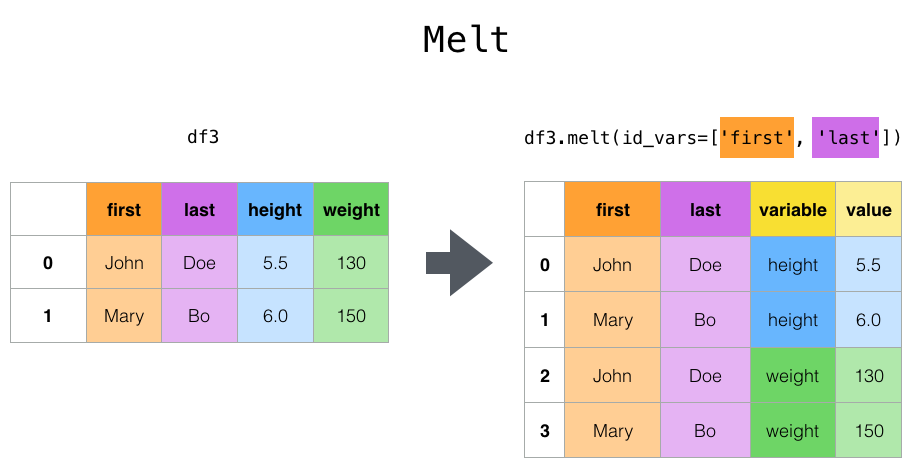

In [98]:
df = pd.DataFrame(
    {
        'Voor':['Jip','Janneke'],
        'Achter':['Boos','Rustig'],
        'lengte':[180,193],
        'gewicht': [89,92]
    }
)
df

Voor  Achter  lengte  gewicht
0      Jip    Boos     180       89
1  Janneke  Rustig     193       92

### df.melt(id_vars=['Voor','Achter'])

In [101]:
df.melt(id_vars=['Voor','Achter'])

Voor  Achter variable  value
0      Jip    Boos   lengte    180
1  Janneke  Rustig   lengte    193
2      Jip    Boos  gewicht     89
3  Janneke  Rustig  gewicht     92

veya 
### pd.melt(df, id_vars =['Voor','Achter'], value_vars =['lengte', 'gewicht'])

In [113]:
pd.melt(df, id_vars =['Voor','Achter'], value_vars =['lengte', 'gewicht'])

Voor  Achter variable  value
0      Jip    Boos   lengte    180
1  Janneke  Rustig   lengte    193
2      Jip    Boos  gewicht     89
3  Janneke  Rustig  gewicht     92

#### Yeni değişken isimlerini belirleme

In [109]:
df.melt(id_vars=['Voor','Achter'], var_name='var1', value_name='var2')

Voor  Achter     var1  var2
0      Jip    Boos   lengte   180
1  Janneke  Rustig   lengte   193
2      Jip    Boos  gewicht    89
3  Janneke  Rustig  gewicht    92

In [112]:
pd.melt(df, id_vars =['Voor','Achter'], value_vars =['lengte', 'gewicht'])

Voor  Achter variable  value
0      Jip    Boos   lengte    180
1  Janneke  Rustig   lengte    193
2      Jip    Boos  gewicht     89
3  Janneke  Rustig  gewicht     92

## Uygulama 4
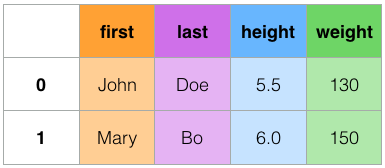
- Yukardaki data frame oluşturun ve aşağıdaki formata dönüştürün. 
- Yeni oluşacak değişken isimlerini var1 ve var2 olarak atayın
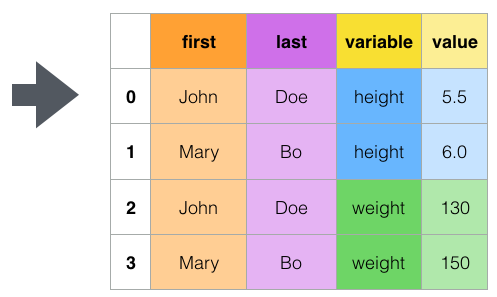

In [119]:
np.array([1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16]).reshape(4,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9,  0, 11, 12],
       [13, 14, 15, 16]])

# Combining with statistic and GroupBy
Özet tablolar oluştururken istatistik methodların kullanılması

In [121]:
columns = pd.MultiIndex.from_product([['A','B'],['a','b']], names=['var1','var2'])

index = pd.MultiIndex.from_product([['Q','T'],['q','t']],names=['ind1','ind2'])

data = np.array([1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16]).reshape(4,4)

df = pd.DataFrame(data, index=index, columns=columns)
df

var1        A       B    
var2        a   b   a   b
ind1 ind2                
Q    q      1   2   3   4
     t      5   6   7   8
T    q      9   0  11  12
     t     13  14  15  16

#### var1 değişkenlerine göre ortalamalar alınarak özet tablo oluşturulması

In [125]:
df.stack().mean(1).unstack()

var2          a     b
ind1 ind2            
Q    q      2.0   3.0
     t      6.0   7.0
T    q     10.0   6.0
     t     14.0  15.0

#### Groupby ile yukardaki sonucun elde edilmesi

In [126]:
df.groupby(level=1, axis=1).mean()

var2        a   b
ind1 ind2        
Q    q      2   3
     t      6   7
T    q     10   6
     t     14  15

#### Groupby methodunda level ve axis parametrelerindeki değişiklikler ile elde edilecek farklı sonuçlar

In [127]:
df.groupby(level=0, axis=1).mean()

var1          A     B
ind1 ind2            
Q    q      1.5   3.5
     t      5.5   7.5
T    q      4.5  11.5
     t     13.5  15.5

In [128]:
df.groupby(level=1, axis=0).mean()

var1  A       B    
var2  a   b   a   b
ind2               
q     5   1   7   8
t     9  10  11  12

# Pivot tables
Yıkarıda pivot methodu ile data frameleri yeniden şekillendirmeyi gördük. Şimdi ise pivot_table methodu ile istatistiki yöntemler kullanarak özet tablolar oluşturmayı öğreneceğiz
It takes a number of arguments:

data: a DataFrame object.

values: a column or a list of columns to aggregate.

index: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table index. If an array is passed, it is being used as the same manner as column values.

columns: a column, Grouper, array which has the same length as data, or list of them. Keys to group by on the pivot table column. If an array is passed, it is being used as the same manner as column values.

aggfunc: function to use for aggregation, defaulting to numpy.mean.

In [146]:
df = pd.DataFrame(
        {
            "var1": ["X", "X", "Y", "Z"] * 2,
            "var2": ["A", "B","B", "C"] * 2,
            "var3": ["a", "b"] * 4,
            "var4": np.array([0,1,2,3,4,5,6,7]),
            "var5": np.array([10,11,12,13,14,15,16,17])
        }
    )
df

var1 var2 var3  var4  var5
0    X    A    a     0    10
1    X    B    b     1    11
2    Y    B    a     2    12
3    Z    C    b     3    13
4    X    A    a     4    14
5    X    B    b     5    15
6    Y    B    a     6    16
7    Z    C    b     7    17

In [148]:
pd.pivot_table(df, values="var4", index="var1")

var4
var1      
X      2.5
Y      4.0
Z      5.0

Yukarıdaki kod ile 
#### pd.pivot_table(df, values="D", index="A",aggfunc=numpy.mean)
aynı sonucu verecektir. aggfunc default değeri numpy.mean dir

In [149]:
pd.pivot_table(df, values="var4", index="var1",aggfunc=np.mean)

var4
var1      
X      2.5
Y      4.0
Z      5.0

#### numpy.mean nerine numpy.sum 

In [150]:
pd.pivot_table(df, values="var4", index="var1",aggfunc=np.sum)

var4
var1      
X       10
Y        8
Z       10

In [137]:
df

A  B  C  D   E
0  X  A  a  0  10
1  X  B  b  1  11
2  Y  B  a  2  12
3  Z  C  b  3  13
4  X  A  a  4  14
5  X  B  b  5  15
6  Y  B  a  6  16
7  Z  C  b  7  17

In [152]:
pd.pivot_table(df, values="var4", index='var1', columns='var3')

var3    a    b
var1          
X     2.0  3.0
Y     4.0  NaN
Z     NaN  5.0

In [153]:
df

var1 var2 var3  var4  var5
0    X    A    a     0    10
1    X    B    b     1    11
2    Y    B    a     2    12
3    Z    C    b     3    13
4    X    A    a     4    14
5    X    B    b     5    15
6    Y    B    a     6    16
7    Z    C    b     7    17

#### pd.pivot_table(df, values="var4", index=["var1", "var2"], columns=["var3"])

In [154]:
pd.pivot_table(df, values="var4", index=["var1", "var2"], columns=["var3"])

var3         a    b
var1 var2          
X    A     2.0  NaN
     B     NaN  3.0
Y    B     4.0  NaN
Z    C     NaN  5.0

In [155]:
df

var1 var2 var3  var4  var5
0    X    A    a     0    10
1    X    B    b     1    11
2    Y    B    a     2    12
3    Z    C    b     3    13
4    X    A    a     4    14
5    X    B    b     5    15
6    Y    B    a     6    16
7    Z    C    b     7    17

In [158]:
pd.pivot_table(df, values="var4", index=["var2"], columns=["var1", "var3"], aggfunc=np.sum)

var1    X         Y     Z
var3    a    b    a     b
var2                     
A     4.0  NaN  NaN   NaN
B     NaN  6.0  8.0   NaN
C     NaN  NaN  NaN  10.0

In [164]:
pd.pivot_table(df, values=["var4",'var5'], index=["var2"],aggfunc={'var4': np.mean,'var5': np.sum})

var4  var5
var2            
A      2.0    24
B      3.5    54
C      5.0    30

## Uygulama 5:

In [167]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9

data frame ile aşağıdaki dataframeleri oluşturnuz
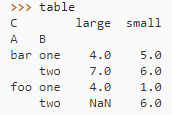
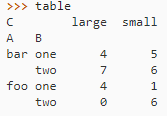
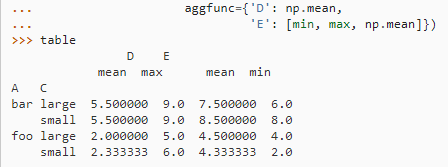

In [169]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [170]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [171]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0